In [1]:
import pandas as pd 
df=pd.read_csv('student_marks.csv')

In [2]:
df.head()

Unnamed: 0 Gender         DOB  Maths  Physics  Chemistry  English  Biology  \
0       John      M  05-04-1988     55       45         56       87       21   
1     Suresh      M  04-05-1987     75       96         78       64       90   
2     Ramesh      M  25-05-1989     25       54         89       76       95   
3    Jessica      F  12-08-1990     78       96         86       63       54   
4   Jennifer      F  02-09-1989     58       96         78       46       96   

   Economics  History  Civics  
0         52       89      65  
1         61       58       2  
2         87       56      74  
3         89       75      45  
4         77       83      53

In [3]:
dfc=df.corr()
dfc

Maths   Physics  Chemistry   English   Biology  Economics  \
Maths      1.000000  0.113354   0.076751 -0.064074 -0.146598   0.000312   
Physics    0.113354  1.000000   0.117192 -0.562608  0.279638   0.191851   
Chemistry  0.076751  0.117192   1.000000 -0.409680  0.318032   0.235390   
English   -0.064074 -0.562608  -0.409680  1.000000 -0.330844   0.237577   
Biology   -0.146598  0.279638   0.318032 -0.330844  1.000000   0.370531   
Economics  0.000312  0.191851   0.235390  0.237577  0.370531   1.000000   
History   -0.320846  0.334082  -0.482710 -0.038775 -0.456131  -0.164953   
Civics    -0.274629 -0.643266   0.210908  0.186705 -0.330060   0.043905   

            History    Civics  
Maths     -0.320846 -0.274629  
Physics    0.334082 -0.643266  
Chemistry -0.482710  0.210908  
English   -0.038775  0.186705  
Biology   -0.456131 -0.330060  
Economics -0.164953  0.043905  
History    1.000000 -0.048686  
Civics    -0.048686  1.000000

<AxesSubplot:>

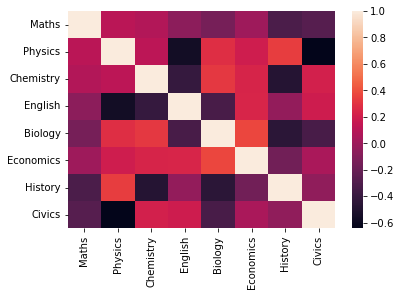

In [4]:
import seaborn as sns
sns.heatmap(dfc)

<AxesSubplot:>

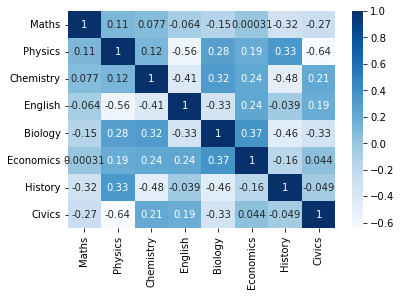

In [10]:
sns.heatmap(dfc,cmap='Blues',annot=True)

# chi square test

In [5]:
df=pd.read_csv('role_website.csv')

In [6]:
df

role   website
0   teacher  linkedin
1   teacher  linkedin
2   student  facebook
3   student  facebook
4   teacher  linkedin
5   student  facebook
6   student  facebook
7   teacher  linkedin
8   teacher  linkedin
9   teacher  facebook
10  teacher  facebook
11  teacher  facebook
12  teacher  facebook
13  student  facebook
14  student  linkedin
15  student  facebook
16  teacher  linkedin
17  student  linkedin
18  student  facebook
19  student  facebook
20  student  linkedin
21  teacher  facebook
22  teacher  linkedin
23  teacher  linkedin
24  teacher  linkedin
25  teacher  linkedin
26  teacher  linkedin
27  teacher  facebook
28  teacher  linkedin
29  teacher  linkedin
30  teacher  linkedin
31  teacher  linkedin
32  student  facebook
33  student  facebook

In [7]:
df.describe()

role   website
count        34        34
unique        2         2
top     teacher  linkedin
freq         21        18

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   role     34 non-null     object
 1   website  34 non-null     object
dtypes: object(2)
memory usage: 672.0+ bytes


In [17]:
df.dtypes

role       object
website    object
dtype: object

In [19]:
df_crosstab=pd.crosstab(df['role'],df['website'],margins=True)

In [20]:
print(df_crosstab)

website  facebook  linkedin  All
role                            
student        10         3   13
teacher         6        15   21
All            16        18   34


In [21]:
df_crosstab.columns=['facebook','linkedin','row_totals']
df_crosstab.index=['student','teacher','col_totals']
df_crosstab

facebook  linkedin  row_totals
student           10         3          13
teacher            6        15          21
col_totals        16        18          34

In [22]:
observed=df_crosstab.iloc[0:2,0:2]
observed

facebook  linkedin
student        10         3
teacher         6        15

In [29]:
from scipy import stats
chi2,p,dof,expected=stats.chi2_contingency(observed=observed)
print('chi square test=',chi2)
print('p-value',p)
print('dof=',dof)
print('expected=',expected)

chi square test= 5.718991656491658
p-value 0.01678236577734386
dof= 1
expected= [[ 6.11764706  6.88235294]
 [ 9.88235294 11.11764706]]


In [26]:
alpha=0.05
print('significance level alpha=%2f,p=%2f' % (alpha,p))
if p>=alpha:
    print('variables are not')
else:
        print('variable are ass')

significance level alpha=0.050000,p=0.016782
variable are ass


In [32]:
from scipy.stats import f_oneway
marks_a=[1,2,3,4,5]
marks_b=[2,3,4,5,6]
marks_c=[2,5,6,8,9]
f_oneway(marks_a,marks_b,marks_c)

F_onewayResult(statistic=2.8000000000000003, pvalue=0.10046423217998134)

In [ ]:
_a